## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기 및 전처리

In [2]:
df_house = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\ADP_study\rawdata\kc_house_data.csv' )
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# 'date' 컬럼의 데이터 사용을 원활히 하기 위해, 년도를 나타내는 'date2' 컬럼 추가
df_house['date2'] = df_house['date'].apply( lambda x: x[0:4] )

# data2 컬럼의 데이터를 숫자로 변환하는 과정이 필요
df_house['date2'] = df_house['date2'].astype('int64')

# 집이 매각된 년도(date2)와 지어진 년도(yr_built)의 기간 차이를 나타내는 변수 추가
df_house['sold-built_years'] = df_house.apply( lambda x: ( (x['date2']) - (x['yr_built']) ), axis=1)

df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2,sold-built_years
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,1
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,5
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,11


# x값(예측변수), y값(목표변수) 설정

In [4]:
# 데이터의 숫자가 너무 많으므로 복원추출로 500개 행만 추출하여 분석

train_house, test_house = train_test_split( df_house,    
                                            train_size = 500,
                                            random_state = 0 )
train_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2,sold-built_years
15605,3762900020,20140624T000000,342500.0,2,1.75,1210,7507,1.0,0,0,...,0,1982,0,98034,47.7078,-122.234,1840,7500,2014,32
7853,1822300040,20140507T000000,420000.0,2,1.50,1040,3500,1.5,0,0,...,0,1904,0,98144,47.5880,-122.304,1340,1213,2014,110
5638,8122100290,20140813T000000,392000.0,2,1.50,940,5000,1.0,0,0,...,130,1925,0,98126,47.5375,-122.374,940,5026,2014,89
4702,4013800131,20140807T000000,267500.0,2,1.00,1747,12250,2.5,0,0,...,0,1948,0,98001,47.3282,-122.285,1620,10300,2014,66
20427,7661600206,20150129T000000,262000.0,4,2.50,2070,8685,2.0,0,0,...,0,2006,0,98188,47.4697,-122.267,2170,9715,2015,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2322069010,20141007T000000,1180000.0,5,5.00,3960,94089,2.0,0,0,...,0,1998,0,98038,47.3800,-122.011,2240,64468,2014,16
19648,2114700368,20141118T000000,299000.0,2,2.50,1400,1262,2.0,0,0,...,240,2008,0,98106,47.5342,-122.349,1060,1524,2014,6
9845,5469501200,20140820T000000,431000.0,3,2.25,2360,14950,1.0,0,0,...,0,1978,0,98042,47.3856,-122.158,2720,14388,2014,36
10799,3751602797,20140702T000000,411000.0,4,2.00,2370,76665,2.0,0,0,...,0,1978,0,98001,47.2831,-122.279,2110,19334,2014,36


In [5]:
list(train_house.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date2',
 'sold-built_years']

In [6]:
x = train_house[ ['bedrooms', 'sqft_living', 'waterfront', 'view', 'sold-built_years'] ]
y = train_house['price']

In [7]:
x

,bedrooms,sqft_living,waterfront,view,sold-built_years
15605,2,1210,0,0,32
7853,2,1040,0,0,110
5638,2,940,0,0,89
4702,2,1747,0,0,66
20427,4,2070,0,0,9
...,...,...,...,...,...
13123,5,3960,0,0,16
19648,2,1400,0,0,6
9845,3,2360,0,0,36
10799,4,2370,0,0,36


# 계층적 군집 분석 수행
-  `scipy.cluster.hierarchy`
- https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

## [참고] 모델 생성 및 학습
- `sklearn.cluster.AgglomerativeClustering()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [8]:
cluster = AgglomerativeClustering( n_clusters = 2,
                                 linkage = 'ward' )

model = cluster.fit_predict(x)

print("Cluster 1의 평균 가격(price): ", np.mean([x for x, y in zip(y, model) if y == 0]))
print("Cluster 2의 평균 가격(price): ", np.mean([x for x, y in zip(y, model) if y == 1])) 

Cluster 1의 평균 가격(price):  436818.1225490196
Cluster 2의 평균 가격(price):  854531.445652174


## 군집화 수행
- `scipy.cluster.hierarchy.linkage()`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [9]:
# 와드 연결법으로 군집화 수행
linked = linkage(x, 'ward')

## 덴드로그램 출력
- `scipy.cluster.hierarchy.dendrogram()`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

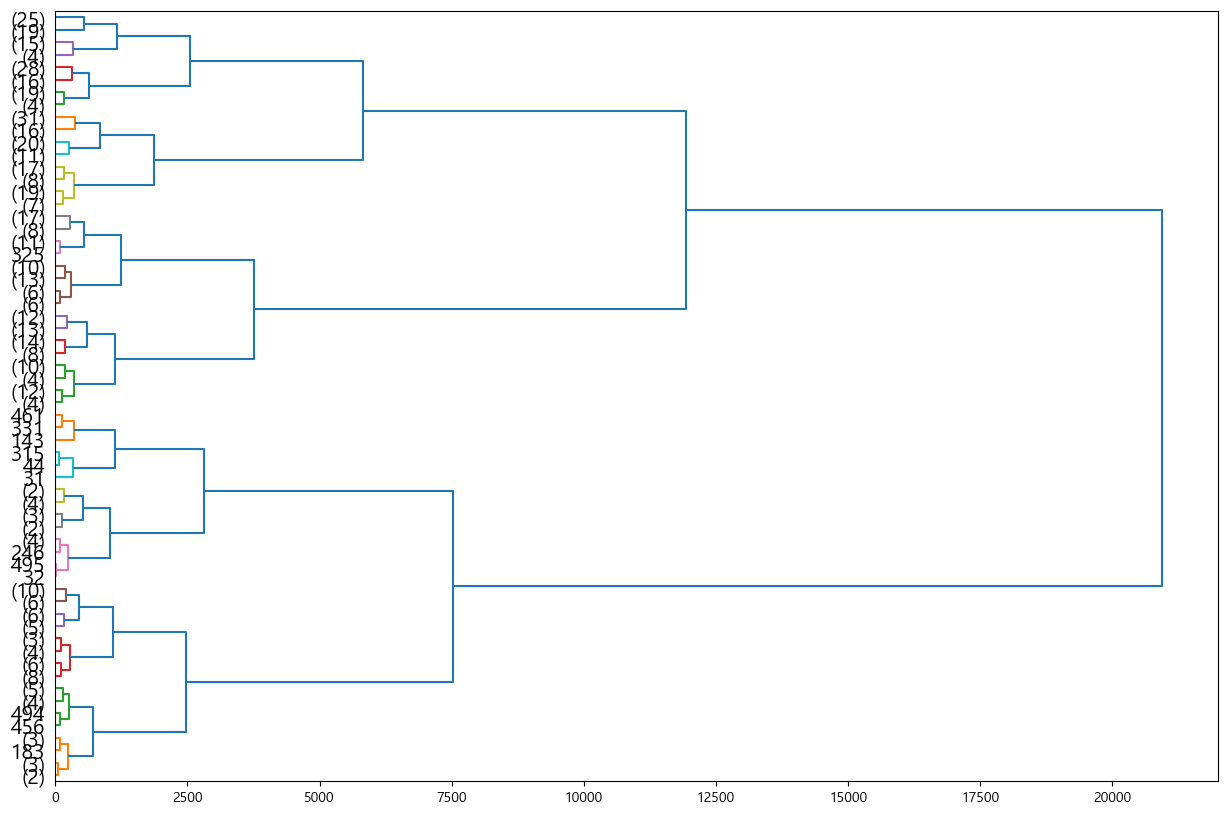

In [13]:
# 덴드로그램 그리기

plt.figure( figsize=(15,10) )

dendrogram( linked,
            truncate_mode = 'level', p = 5,  # 6개 군집까지만 출력
            color_threshold = 400,
            orientation = 'right',
            leaf_font_size = 15)

plt.show()

# 군집화 결과 확인
- `scipy.cluster.hierarchy.fcluster()`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [ ]:
cut_tree = fcluster( linked,
                     criterion = 'maxclust', t = 4 )
cut_tree

In [ ]:
# 군집화 값과 price 매칭

df_group = pd.DataFrame( {'pred_group':cut_tree,
                           'price':y} )

pd.set_option('display.max_row', 50)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_group.sort_values('pred_group')

In [ ]:
# 그룹별 평균 가격
df_group.groupby('pred_group').mean('price')

In [ ]:
# price 출력결과가 지수표현식으로 나옴. 실수로 표현되도록 변경 
pd.options.display.float_format = '{:.2f}'.format

# 그룹별 평균 가격
df_group.groupby('pred_group').mean('price')

In [ ]:
df_result = pd.concat( [df_group, x] , axis = 1)
df_result

In [ ]:
df_result[ df_result['pred_group'] == 1 ].describe()

In [ ]:
df_result[ df_result['pred_group'] == 2 ].describe()

In [ ]:
df_result[ df_result['pred_group'] == 3 ].describe()

In [ ]:
df_result[ df_result['pred_group'] == 4 ].describe()

In [ ]:
df_result['sqft_living'][ df_result['pred_group']==1 ]

In [ ]:
plt.figure(figsize=(12,6))

plt.scatter(
    df_result['sqft_living'][ df_result['pred_group']==1 ],
    df_result['sold-built_years'][ df_result['pred_group']==1 ],
    s=40, c='red',
    marker='o', label='cluster 1'
)

plt.scatter(
    df_result['sqft_living'][ df_result['pred_group']==2 ],
    df_result['sold-built_years'][ df_result['pred_group']==2 ],
    s=40, c='green',
    marker='o', label='cluster 2'
)

plt.scatter(
    df_result['sqft_living'][ df_result['pred_group']==3 ],
    df_result['sold-built_years'][ df_result['pred_group']==3 ],
    s=40, c='blue',
    marker='o', label='cluster 3'
)

plt.scatter(
    df_result['sqft_living'][ df_result['pred_group']==4 ],
    df_result['sold-built_years'][ df_result['pred_group']==4 ],
    s=40, c='m',
    marker='o', label='cluster 4'
)


plt.xlabel('sqft_living')
plt.ylabel('sold-built_years')

plt.legend()
plt.grid()
plt.show()

산점도 행렬
https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

In [ ]:
sb.pairplot( df_result, hue = 'pred_group',
             palette='bright',
             plot_kws=dict(s=50, linewidth=1) )